<a href="https://colab.research.google.com/github/faranak1995/Recommendation-System-on-Amazon/blob/main/Recommendation_System_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 26.0 MB/s eta 0:00:00


# Crawling on Amazon.com website

In [5]:
# Crawling on 10 products
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

# Configure Selenium WebDriver
def configure_driver():
    options = Options()
    options.add_argument("--headless")  # Run in headless mode
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-gpu")
    options.add_argument("--disable-extensions")
    options.add_argument("--start-maximized")
    options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    )
    try:
        driver = webdriver.Chrome(options=options)
    except Exception as e:
        print(f"Error initializing WebDriver: {e}")
        driver = None
    return driver

# Extract product details
def extract_product_details(url):
    driver = configure_driver()
    if not driver:
        print("Failed to initialize WebDriver. Exiting...")
        return None
    try:
        # Fetch the page
        driver.get(url)
        # Explicit wait for the product title
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.ID, "productTitle"))
        )

        # Parse the HTML with BeautifulSoup
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")

        # Extract product title
        product_title = soup.select_one("#productTitle")
        product_title = product_title.text.strip() if product_title else "Title not found"

        # Extract product price
        price_whole = soup.select_one(".a-price-whole")
        price_fraction = soup.select_one(".a-price-fraction")

        if price_whole and price_fraction:
            product_price = f"{price_whole.text.strip()}.{price_fraction.text.strip()}"
        elif price_whole:
            product_price = price_whole.text.strip()
        else:
            product_price = "Price not found"

        # Ensure price formatting
        product_price = product_price.replace("..", ".")  # Remove duplicate dots

        # Extract product rating
        product_rating = soup.select_one(".a-icon-alt")
        product_rating = product_rating.text.strip() if product_rating else "Rating not found"

        # Return the details as a dictionary
        return {"title": product_title, "price": product_price, "rating": product_rating}

    except Exception as e:
        print(f"Error occurred: {e}")
        return None

    finally:
        # Close the WebDriver
        driver.quit()

# Function to process multiple URLs
def process_urls(urls):
    results = set()
    for url in urls:
        print(f"Processing URL: {url}")
        details = extract_product_details(url)
        if details:
            results.add(frozenset(details.items()))  # Use frozenset for hashable dictionary
    return results

# List of Amazon product URLs
urls = [
    "https://www.amazon.com/Fluent-Python-Concise-Effective-Programming/dp/1492056359/",
    "https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/",
    "https://www.amazon.com/Automate-Boring-Stuff-Python-2nd/dp/1593279922/",
    "https://www.amazon.com/dp/B0D33KYP34/",
    "https://www.amazon.com/dp/B0BTRRLCYZ/",
    "https://www.amazon.com/dp/B0CSY7BL6Q/",
    "https://www.amazon.com/dp/B0CWD8SJCN/",
    "https://www.amazon.com/dp/B0D3YNFX41/",
    "https://www.amazon.com/dp/B0DR8HHL9R/",
    "https://www.amazon.com/dp/B08TRLB4SD/"
]

# Process the URLs and print the results
product_details_set = process_urls(urls)

# Convert the frozenset back to a readable format and print
for details in product_details_set:
    print(dict(details))


Processing URL: https://www.amazon.com/Fluent-Python-Concise-Effective-Programming/dp/1492056359/
Processing URL: https://www.amazon.com/Python-Crash-Course-2nd-Edition/dp/1593279280/
Processing URL: https://www.amazon.com/Automate-Boring-Stuff-Python-2nd/dp/1593279922/
Processing URL: https://www.amazon.com/dp/B0D33KYP34/
Processing URL: https://www.amazon.com/dp/B0BTRRLCYZ/
Processing URL: https://www.amazon.com/dp/B0CSY7BL6Q/
Processing URL: https://www.amazon.com/dp/B0CWD8SJCN/
Processing URL: https://www.amazon.com/dp/B0D3YNFX41/
Processing URL: https://www.amazon.com/dp/B0DR8HHL9R/
Processing URL: https://www.amazon.com/dp/B08TRLB4SD/
{'rating': '5.0 out of 5 stars', 'title': 'Python Programming for Beginners: Transform Your Future with Our Revolutionary Fast-Track Method - Featuring Exclusive, Real-World Projects & Insider Expertise.', 'price': '15.97'}
{'rating': '4.7 out of 5 stars', 'price': '43.99', 'title': 'Fluent Python: Clear, Concise, and Effective Programming'}
{'price

# Recommendation System

## Define Recommendation Criteria
We define the criteria for making recommendations.

* **Target Audience**: Beginner programmers.
* **Priority**: Price under $30 with a good rating.
* **Use Case**: Recommending Python programming books.

## Data Preparation
We format the crawled data into a clean structure for processing.

Since we've already collected product data (title, price, and rating), we'll ensure it is structured properly for further processing.

In [8]:
import pandas as pd

# Sample data extracted from the crawling
data = [
    {"title": "Fluent Python: Clear, Concise, and Effective Programming", "price": 43.99, "rating": 4.7},
    {"title": "Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming", "price": 39.95, "rating": 4.7},
    {"title": "Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners", "price": 22.04, "rating": 4.7},
    {"title": "Python Programming for Beginners: Transform Your Future with Our Revolutionary Fast-Track Method", "price": 15.97, "rating": 5.0},
    {"title": "Python Programming for Beginners: The Complete Guide to Mastering Python in 7 Days", "price": 21.82, "rating": 4.3},
    {"title": "Python Programming for Beginners: 4 Books in 1: No-Fail, Step-by-Step Guide to Master Python in 30 Days", "price": 24.97, "rating": 4.7},
    {"title": "Python Programming: 3 Books in 1: The Complete Beginner’s Guide to Learning the Most Popular Programming Language", "price": 19.99, "rating": 4.2},
    {"title": "Python, Java, SQL & JavaScript: The Ultimate Crash Course for Beginners", "price": 26.97, "rating": 4.6},
    {"title": "Python Automation Crash Course: 3 books in 1 - The Ultimate Guide to Mastering Python Automation", "price": 28.99, "rating": 5.0},
    {"title": "Python Programming for Beginners: The Complete Python Coding Crash Course", "price": 23.97, "rating": 4.7},
]

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Crawled Product Data:")
print(df)

# Optionally save the data to a CSV file for future use
df.to_csv("crawled_product_data.csv", index=False)


Crawled Product Data:
                                               title  price  rating
0  Fluent Python: Clear, Concise, and Effective P...  43.99     4.7
1  Python Crash Course, 2nd Edition: A Hands-On, ...  39.95     4.7
2  Automate the Boring Stuff with Python, 2nd Edi...  22.04     4.7
3  Python Programming for Beginners: Transform Yo...  15.97     5.0
4  Python Programming for Beginners: The Complete...  21.82     4.3
5  Python Programming for Beginners: 4 Books in 1...  24.97     4.7
6  Python Programming: 3 Books in 1: The Complete...  19.99     4.2
7  Python, Java, SQL & JavaScript: The Ultimate C...  26.97     4.6
8  Python Automation Crash Course: 3 books in 1 -...  28.99     5.0
9  Python Programming for Beginners: The Complete...  23.97     4.7


## Analyze the Data

In [10]:
# Find the Most Expensive Product
most_expensive = df.loc[df['price'].idxmax()]
print("Most Expensive Product:")
print(most_expensive)


Most Expensive Product:
title     Fluent Python: Clear, Concise, and Effective P...
price                                                 43.99
rating                                                  4.7
Name: 0, dtype: object


In [11]:
# Find the Highest-Rated Product(s)
highest_rated = df[df['rating'] == df['rating'].max()]
print("Highest Rated Product(s):")
print(highest_rated)

Highest Rated Product(s):
                                               title  price  rating
3  Python Programming for Beginners: Transform Yo...  15.97     5.0
8  Python Automation Crash Course: 3 books in 1 -...  28.99     5.0


In [12]:
# Average Price of All Products
average_price = df['price'].mean()
print(f"Average Price of All Products: ${average_price:.2f}")

Average Price of All Products: $26.87


## Apply the Recommendation Criteria
Based on the given data, let's implement the recommendation criteria:

**Criteria**:

Price under $30.
Rating of 4.5 or higher.
Books suitable for beginner programmers.

In [14]:
# Apply recommendation criteria
recommended_books = df[(df['price'] < 30) & (df['rating'] >= 4.5)]

# Further filter for beginner-friendly books (assuming beginner-related keywords in the title)
beginner_keywords = ["beginner", "beginners", "crash course"]
recommended_books = recommended_books[
    recommended_books["title"].str.contains("|".join(beginner_keywords), case=False, na=False)
]

# Display recommended books
print("Recommended Books for Beginners:")
print(recommended_books)

# Optionally save to a CSV for future use
recommended_books.to_csv("recommended_books.csv", index=False)

Recommended Books for Beginners:
                                               title  price  rating
2  Automate the Boring Stuff with Python, 2nd Edi...  22.04     4.7
3  Python Programming for Beginners: Transform Yo...  15.97     5.0
5  Python Programming for Beginners: 4 Books in 1...  24.97     4.7
7  Python, Java, SQL & JavaScript: The Ultimate C...  26.97     4.6
8  Python Automation Crash Course: 3 books in 1 -...  28.99     5.0
9  Python Programming for Beginners: The Complete...  23.97     4.7


In [15]:
# Save to a CSV file
recommended_books.to_csv("recommended_books.csv", index=False)

# Save to an Excel file
recommended_books.to_excel("recommended_books.xlsx", index=False)


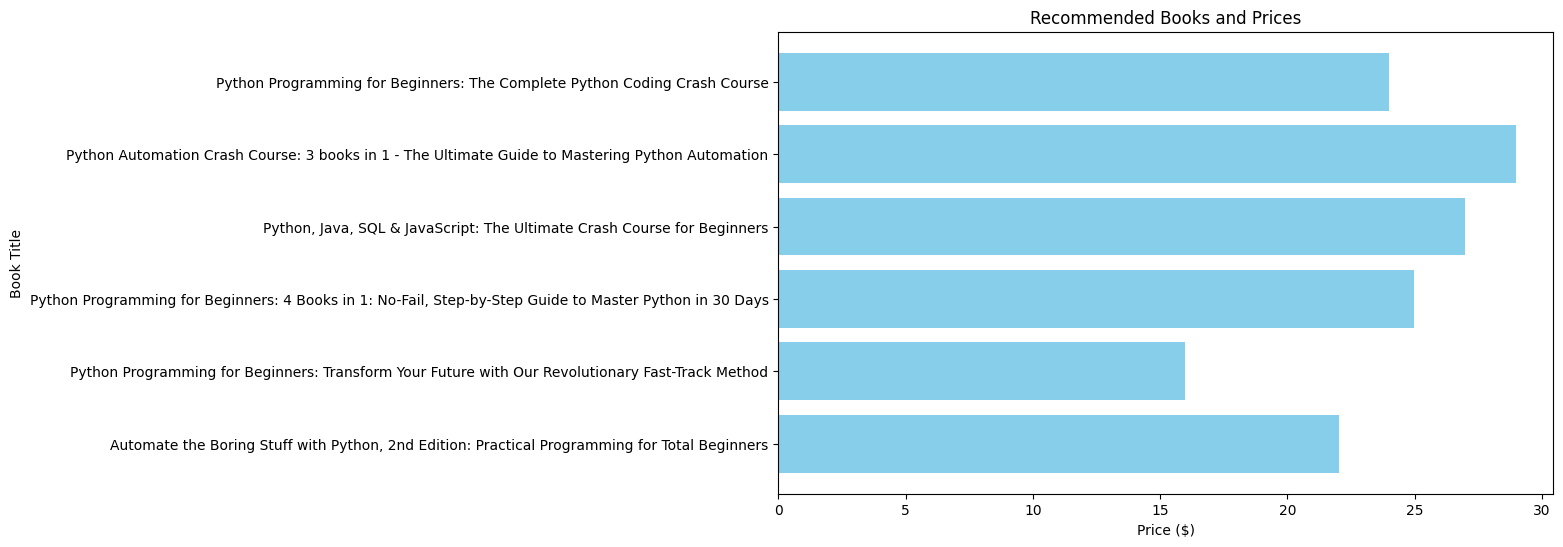

In [16]:
import matplotlib.pyplot as plt

# Bar chart for prices of recommended books
plt.figure(figsize=(10, 6))
plt.barh(recommended_books['title'], recommended_books['price'], color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Book Title')
plt.title('Recommended Books and Prices')
plt.show()
